**Importing libraries**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

**Importing the data**

In [2]:
mydata  = pd.read_csv("aapl.us.txt")

**Checking the data**

In [4]:
mydata.head(5)

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


**Checking null values**

In [ ]:
missing_val = pd.DataFrame(mydata.isnull().sum())

In [6]:
missing_val

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
OpenInt,0


**Prices is the predict value and initial the independet variable (y) **

In [8]:
prices = mydata['Close'].tolist()
initial = mydata['Open'].tolist()
 
#Convert to 1d Vector
prices = np.reshape(prices, (len(prices), 1))
initial = np.reshape(initial, (len(initial), 1))

In [11]:
prices

array([[  0.42388],
       [  0.42134],
       [  0.42902],
       ...,
       [175.61   ],
       [175.25   ],
       [174.67   ]])

**Describing the data**

In [13]:
mydata.describe()

,Open,High,Low,Close,Volume,OpenInt
count,8364.000000,8364.000000,8364.000000,8364.000000,8.364000e+03,8364.0
mean,22.284350,22.495867,22.054244,22.281018,1.066416e+08,0.0
std,37.763402,38.057733,37.447432,37.764469,9.935187e+07,0.0
min,0.233050,0.235640,0.230510,0.230510,0.000000e+00,0.0
25%,1.137100,1.164200,1.112800,1.137100,4.384365e+07,0.0
50%,1.632800,1.663400,1.600600,1.628250,7.481383e+07,0.0
75%,23.739000,23.930500,23.335750,23.694500,1.320534e+08,0.0
max,175.110000,175.610000,174.270000,175.610000,2.069770e+09,0.0


**plot for open data**

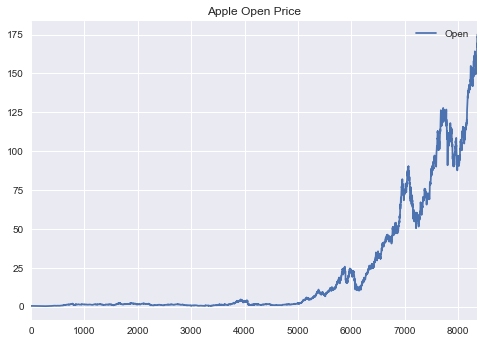

In [14]:
mydata[['Open']].plot()
plt.title('Apple Open Price')
plt.show()

**Plot for closing data**

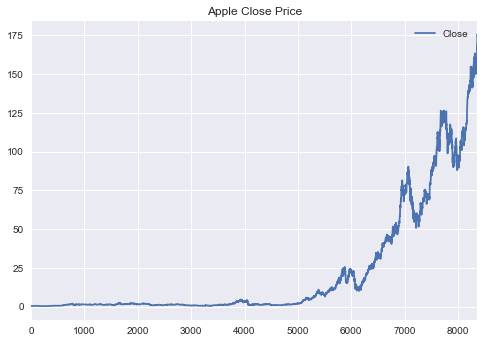

In [16]:
mydata[['Close']].plot()
plt.title('Apple Close Price')
plt.show()

**Heatmap**

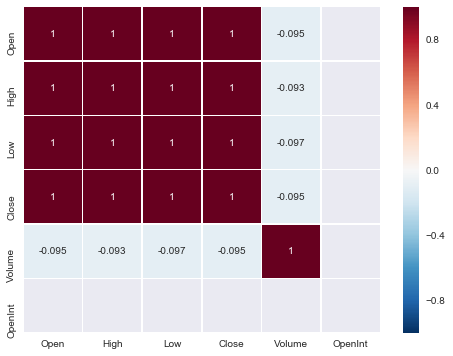

In [22]:
plt.subplots(figsize=(8,6))
sns.heatmap(mydata.corr(),annot=True, linewidth=.5,)

**Histogram of open variables**

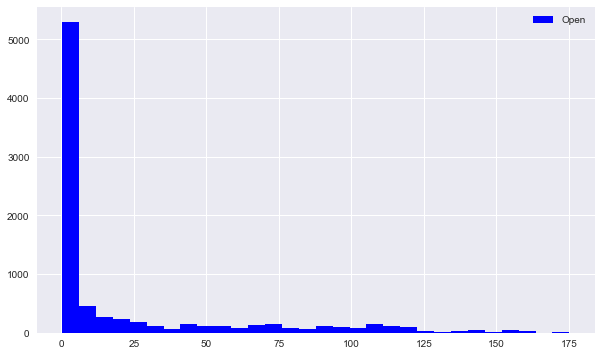

In [23]:
plt.figure(figsize=(10,6))
mydata['Open'].hist(color='blue',bins=30,label='Open')
plt.legend()

**Histogram of close variables**

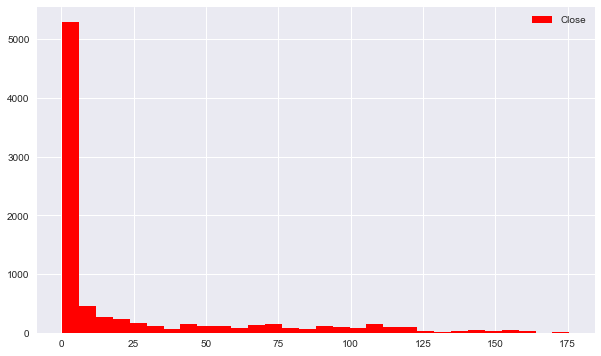

In [24]:
plt.figure(figsize=(10,6))
mydata['Close'].hist(color='red',bins=30,label='Close')
plt.legend()

**Outlier analysis using boxplot**

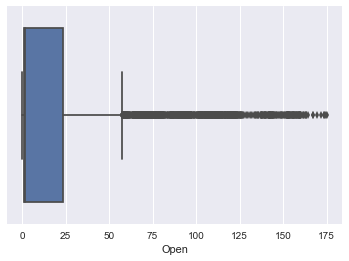

In [25]:
sns.boxplot(x=mydata['Open'])

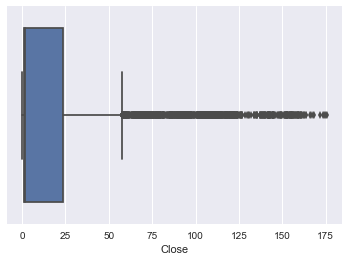

In [26]:
sns.boxplot(x=mydata['Close'])

**Splitting the dataset into the Training set and Test set**

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(initial, prices, test_size=0.33, random_state=42)
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Train Set Graph**

Train-set / R2 score: 0.9998160111411921


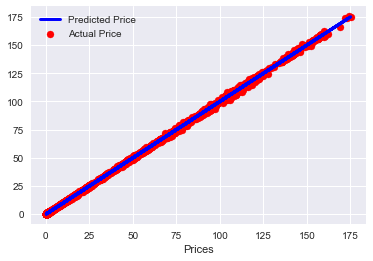

In [29]:
print('Train-set /','R2 score:',r2_score(ytrain,regressor.predict(xtrain)))
plt.scatter(xtrain, ytrain, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.legend()
plt.xlabel('Prices')
plt.show()

**Test Set Graph**

Test-set/ R2 score: 0.9997782004391842


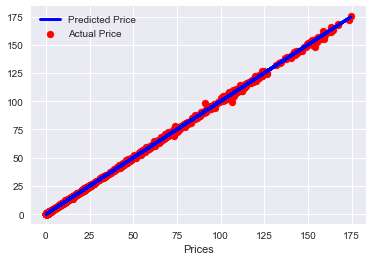

In [30]:
print('Test-set/','R2 score:',r2_score(ytest,regressor.predict(xtest)))
plt.scatter(xtest, ytest, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.legend()
plt.xlabel('Prices')
plt.show()